In [33]:
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Please write your name below** (in case the file names get mixed up)

In [34]:
#BISHT Aayush

**Generic note**: in this whole lab and from now, unless explicitly asked, you are not required to implement yourself the algorithms that you use. You may instead use existing implementations from e.g. scikit-learn.

In general, when you use implementations of algorithms that are not your own (which will be the case 99% of the time in real life), it is a good idea to check the documentation of the libraries you use to make sure you are not missing something important. As such, you are strongly encouraged to do so in this lab.

**Note bis**: in this lab, some questions may be (deliberately) ambiguous, or there may be multiple acceptable solutions (but also some unacceptable ones). So do not panic if you do not have exactly the same result as your neighbor, or as the future solution.

The goal is to make you learn by forcing you to think about what is happening and what should be done in different situations. However, so goal is **not** to punish you by giving you a bad grade because of some trick questions. So once again, **do not hesitate to ask questions**, and do not hesitate to ask an instructor whether your solution seems correct during lab sessions.

# Dataset

Let's load data for classification. This data is generated and does not a precise meaning: the idea will be to build intuition about what is going on with different models.

Dataset can be downloaded here: https://drive.google.com/file/d/1Sy0Ly4Xj8fzPAiPru9oFS6evgQjuNMs4/view?usp=sharing

In [35]:
# Load the dataset;
# make sure that the file is located in the same folder as the notebook
# (or change the path)
dataset = np.load("dataset.npy")

In [36]:
dataset.shape

(300, 3)

In [37]:
# Extract features and targets
X = dataset[:,:2] # features are first 2 columns
y = dataset[:,-1] # labels are last column
print(f'Shape of feature matrix: {X.shape}')


Shape of feature matrix: (300, 2)


# Data preparation

We are going to do classification with different models, that will require selecting some hyper-parameter(s).

**In general, how should the dataset be split in this case?**

In [38]:
# in general it's train and test
# but we will use train, validate and split

**For now, split the dataset into one training, one validation and one testing sets.** You can use the sklearn.model_selection.train_test_split function (but you don't have to).

We shall use the name X_train, X_val and X_test (respectively y_train, y_val and y_test) to refer to the samples (respectively labels) of these sets.

In [39]:
# X_train, X_val and X_test 
#  y_train, y_val and y_test
# x -> first 2 column i.e features
# y -> last col i.e. target

X = dataset[:,:2]
y = dataset[:,2]

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y if len(np.unique(y)) < 20 else None
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp if len(np.unique(y)) < 20 else None
)

print(X_train.shape, X_val.shape, X_test.shape)

(180, 2) (60, 2) (60, 2)


It is generally a good idea to have a look at the data whenever possible.

**Display the training dataset using a scatterplot**

*We should display colors for classes (or any other way to differentiate them such as shapes), otherwise we are not learning much.*

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

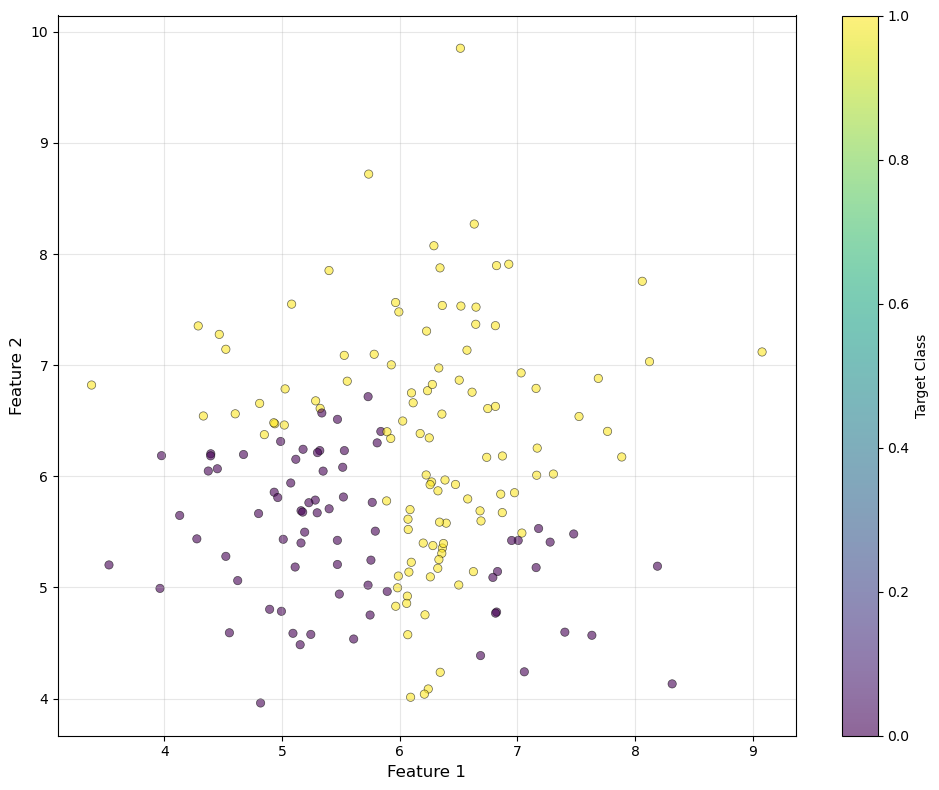

In [71]:
plt.figure(figsize=(10, 8))

scatter = plt.scatter(
    X_train[:, 0], 
    X_train[:, 1], 
    c=y_train, 
    cmap='viridis', 
    alpha=0.6, 
    edgecolors='black', 
    linewidth=0.5
)

plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.colorbar(scatter, label='Target Class')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# (Linear) model training

## Basic model training

**Train a first <ins>linear</ins>, <ins>classification</ins> model.** Do **not** use regularization for now.

You don't have to reimplement everything, you can use existing implementations (for example the one from scikit-learn). Don't evaluate the performance of the model for now, just train it.

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [43]:
model = LogisticRegression(penalty=None, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

print("Model trained successfully!")
print(f"Model coefficients (weights): {model.coef_}")
print(f"Model intercept (bias): {model.intercept_}")
print()

Model trained successfully!
Model coefficients (weights): [[1.06890966 1.44576889]]
Model intercept (bias): [-14.33894196]



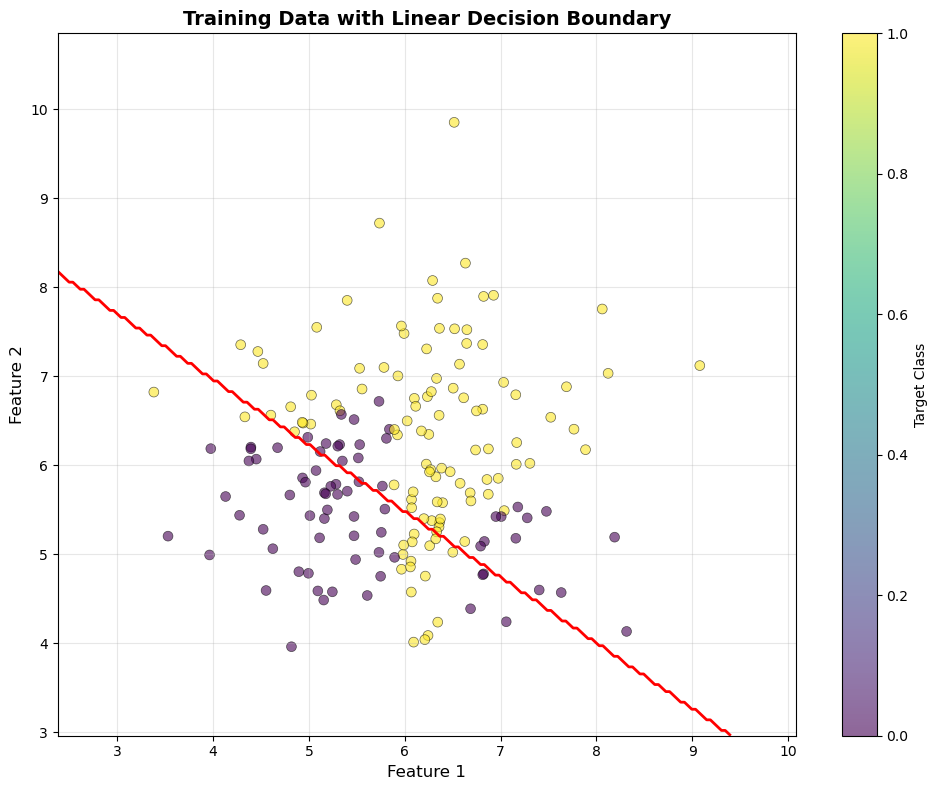

In [44]:
# Visualize the training data with decision boundary
plt.figure(figsize=(10, 8))

# Plot training points
scatter = plt.scatter(
    X_train[:, 0], 
    X_train[:, 1], 
    c=y_train, 
    cmap='viridis', 
    alpha=0.6, 
    edgecolors='black', 
    linewidth=0.5,
    s=50
)

# Plot decision boundary
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='red', linewidths=2, levels=[0.5])

plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('Training Data with Linear Decision Boundary', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Target Class')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Are you *certain* your model does not have regularization?**

Yes, I am quite certain. As I have assigned "None" in penalty parameter, while creating the model.

**What is the score of the model?**

(by "score", we mean "accuracy" here, i.e. the fraction of correct predictions).

In [52]:
train_score = model.score(X_train, y_train)
val_score = model.score(X_val, y_val)
test_score = model.score(X_test, y_test)

In [62]:
print(f"Training set accuracy: {train_score:.4f} ({train_score*100:.2f}%)")
print(f"Validation set accuracy: {val_score:.4f} ({val_score*100:.2f}%)")
print(f"Test set accuracy: {test_score:.4f} ({test_score*100:.2f}%)")

Training set accuracy: 0.7556 (75.56%)
Validation set accuracy: 0.7167 (71.67%)
Test set accuracy: 0.8667 (86.67%)


**What if, instead of directly doing binary classification, we wanted to have some estimation of how confident the model is?**

Or, how could we obtain probabilities between 0 and 1 instead of binary predictions? (**Hint**: look at the doc of the model you used).

**Don't answer the question with words, directly provide the corresponding probability estimates.**

In [70]:
train_prob = model.predict_proba(X_train)
val_prob = model.predict_proba(X_val)
test_prob = model.predict_proba(X_test)
print(f"first 5 training probability estimates: \n{train_prob[:5]}") # first 5 estimates from train dataset
print(f"first 5 validation probability estimates: \n{val_prob[:5]}")# first 5 estimates from validate dataset
print(f"first 5 testing probability estimates: \n{test_prob[:5]}") # first 5 estimates from test dataset

first 5 training probability estimates: 
[[0.65710702 0.34289298]
 [0.36305781 0.63694219]
 [0.03174676 0.96825324]
 [0.67274419 0.32725581]
 [0.4337255  0.5662745 ]]
first 5 validation probability estimates: 
[[0.11274076 0.88725924]
 [0.3775391  0.6224609 ]
 [0.18102341 0.81897659]
 [0.05217167 0.94782833]
 [0.67404845 0.32595155]]
first 5 testing probability estimates: 
[[0.82849955 0.17150045]
 [0.28978762 0.71021238]
 [0.81841818 0.18158182]
 [0.66887635 0.33112365]
 [0.17616524 0.82383476]]


**Assuming we only had these probabilities, could we still make binary predictions?**

Yes. We can use direct binary prediction, where if probability is > 0.5 then class 1, else class 0

## Visualization of predictions

Now, let's visualize our probability estimates. Scikit-learn provides a useful tool for this: DecisionBoundaryDisplay.

The exact way it works is not that important, but the general is: we use our model to predict a probability for every pixel in the area of interest, based on its coordinates (which are its 2D features), and we display a color  corresponding to the estimated probability.

In [45]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression

I will retrain a logistic regression for the purpose of illustrating this. This may not be the exact solution to the previous questions.

In [46]:
# Train a logistic regression
logreg = LogisticRegression() # (hyper)-parameters may differ from previous question
logreg.fit(X_train, y_train)

LogisticRegression()

And now we display the probabilities:

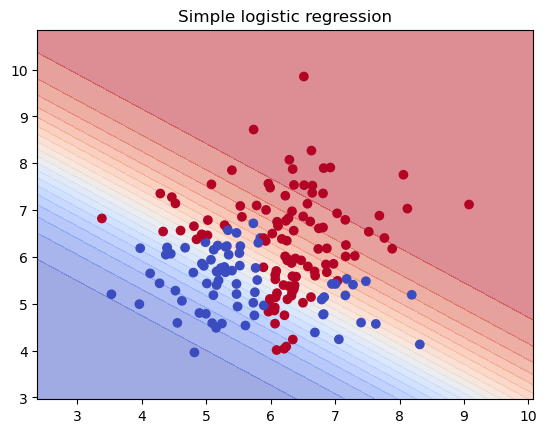

In [47]:
# Use DecisionBoundaryDisplay to display a heatmap corresponding to the estimated probabilities
disp = DecisionBoundaryDisplay.from_estimator(
    logreg, X_train,
    response_method="predict_proba",
    cmap=plt.cm.coolwarm, # colors to use (0 is blue, 1 is red)
    alpha=0.5, # level of transparency
    levels=20 # use 20 different nuances of color
)
# Add the training points on top using a scatterplot
disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.title("Simple logistic regression")
plt.show()

**Does this look like a good fit?**

No, Linear model does not fit apporpriately in this case

**Could we adapt our logistic regression model to have non-linear decision boundaries? How?**

Yes, using polynomial features

## Non-linear logistic regression

**Train a logistic regression model using polynomial features. Are there any hyper-parameter? If yes, use a <ins>rigorous</ins> selection process to select an appropriate value.**

You can ignore regularization for now.

In [84]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
import numpy as np

# hyperparameter selection

# range of degrees to test
degrees = range(1, 21)
validation_scores = []
best_score = 0
best_degree = 0

# Looping through each degree to find the best one
for d in degrees:
    # polynomial features for the training data
    poly_features = PolynomialFeatures(degree=d, include_bias=False)
    X_train_poly = poly_features.fit_transform(X_train)
    
    # training the logistic regression model
    clf = LogisticRegression(penalty=None, max_iter=1000, random_state=42)
    clf.fit(X_train_poly, y_train)
    
    # polynomial features for the validation data
    X_val_poly = poly_features.transform(X_val)
    
    # Score the model on the validation set
    validation_score = clf.score(X_val_poly, y_val)
    validation_scores.append(validation_score)
    
    print(f"Degree {d}: Validation Accuracy = {validation_score:.4f}")
    
    # best score and degree
    if validation_score > best_score:
        best_score = validation_score
        best_degree = d

print(f"The best degree found is: {best_degree}")
print(f"This degree achieved a validation accuracy of: {best_score:.4f}")

Degree 1: Validation Accuracy = 0.7167
Degree 2: Validation Accuracy = 0.7667
Degree 3: Validation Accuracy = 0.8500
Degree 4: Validation Accuracy = 0.8500


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Degree 5: Validation Accuracy = 0.8167
Degree 6: Validation Accuracy = 0.8333
Degree 7: Validation Accuracy = 0.8833
Degree 8: Validation Accuracy = 0.8667


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Degree 9: Validation Accuracy = 0.9000
Degree 10: Validation Accuracy = 0.9167
Degree 11: Validation Accuracy = 0.9333


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Degree 12: Validation Accuracy = 0.9000
Degree 13: Validation Accuracy = 0.9167
Degree 14: Validation Accuracy = 0.9167


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Degree 15: Validation Accuracy = 0.9167
Degree 16: Validation Accuracy = 0.9167


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Degree 17: Validation Accuracy = 0.9167
Degree 18: Validation Accuracy = 0.9167


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Degree 19: Validation Accuracy = 0.9167
Degree 20: Validation Accuracy = 0.9167
The best degree found is: 11
This degree achieved a validation accuracy of: 0.9333


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**If you were to proudly announce the performance of your model to the public, what is the value that you would you disclose?**

The best degree found is: 11
This degree achieved a validation accuracy of: 0.9333

Now, we may want to also visualize the decision boundaries of our model with polynomial features.

Unfortunately, giving a matrix X_train_poly (for instance) of shape (100, 10) (for instance) to DecisionBoundaryDisplay.from_estimator will result in an error, as DecisionBoundaryDisplay only knows how to handle pixels in 2D, not in 10D.

Fortunately, we can combine a series of transformation on X_train as a single estimator using scikit-learn's Pipeline. We can also introduce other preprocessing (or even postprocessing) steps in the process, such as feature standardization.

In [85]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [86]:
# Create a pipeline that first standardizes the data,
# then transforms it with PolynomialFeatures
# and finally fits LogisticRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()), # standardize features
    ('poly', PolynomialFeatures(degree=2)), # for instance
    ('logreg', LogisticRegression(max_iter=500)) # for instance
])

Now we can directly call "fit" on this pipeline to train the model, and give this pipeline to DecisionBoundaryDisplay so that for each pixel, it can:
- compute the corresponding polynomial features from the initial 2D coordinates
- give these features to our logistic regression

and then display the heatmap of estimated probabilities as previously.

In [87]:
# Fit the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('poly', PolynomialFeatures()),
                ('logreg', LogisticRegression(max_iter=500))])

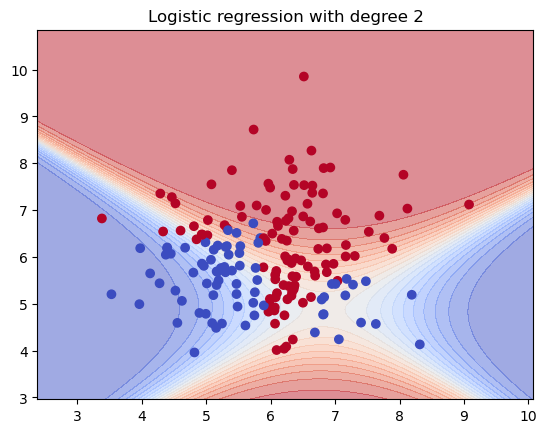

In [88]:
# Give the pipeline to DecisionBoundaryDisplay to plot the probability heatmap
disp = DecisionBoundaryDisplay.from_estimator(
    pipeline, X_train,
    response_method="predict_proba",
    cmap=plt.cm.coolwarm, # colors to use (0 is blue, 1 is red)
    alpha=0.5, # level of transparency
    levels=20 # use 20 different nuances of color
)
disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.title("Logistic regression with degree 2")
plt.show()

**Do the features <ins>used</ins> by the model have zero mean and unit standard deviation with our current pipeline? If not, what should be changed so that this is the case?**

No, I think we should apply standardization before.

**Now plot the probability heatmap of *your* model from earlier**

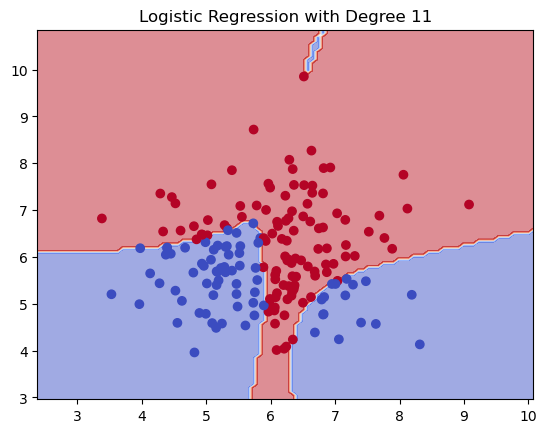

In [99]:
# Create a pipeline with the best degree
best_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=11)),
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(penalty=None, max_iter=5000)) # Increased max_iter for convergence
])

# Fit the pipeline
best_pipeline.fit(X_train, y_train)

# Plot the probability heatmap
plot_contour(X_train, y_train, best_pipeline, title="Logistic Regression with Degree 11")

**Any observation?**

When degree = 11, the decision boundary fits the training data very closely. and sstart doing overfitting, where the model learns the noise in the training data.

# Exploration of other algorithms

Now, we will use the heatmap displays to build some intuition about what happens with other classification algorithms.

## K-Nearest Neighbors

**Can we obtain probabilities with K-NN?**

For this question, "probability" may be interpreted as "a measure of confidence more precise than a yes/no answer".

Yes. For a given point, the "probability" for each class can be estimated as the proportion of neighbors belonging to that class. For example, if K=5 and 4 out of the 5 nearest neighbors belong to Class 1

**Fit K-NN on the training dataset with K ranging for 1 to 6, and plot the confidence heatmap.**

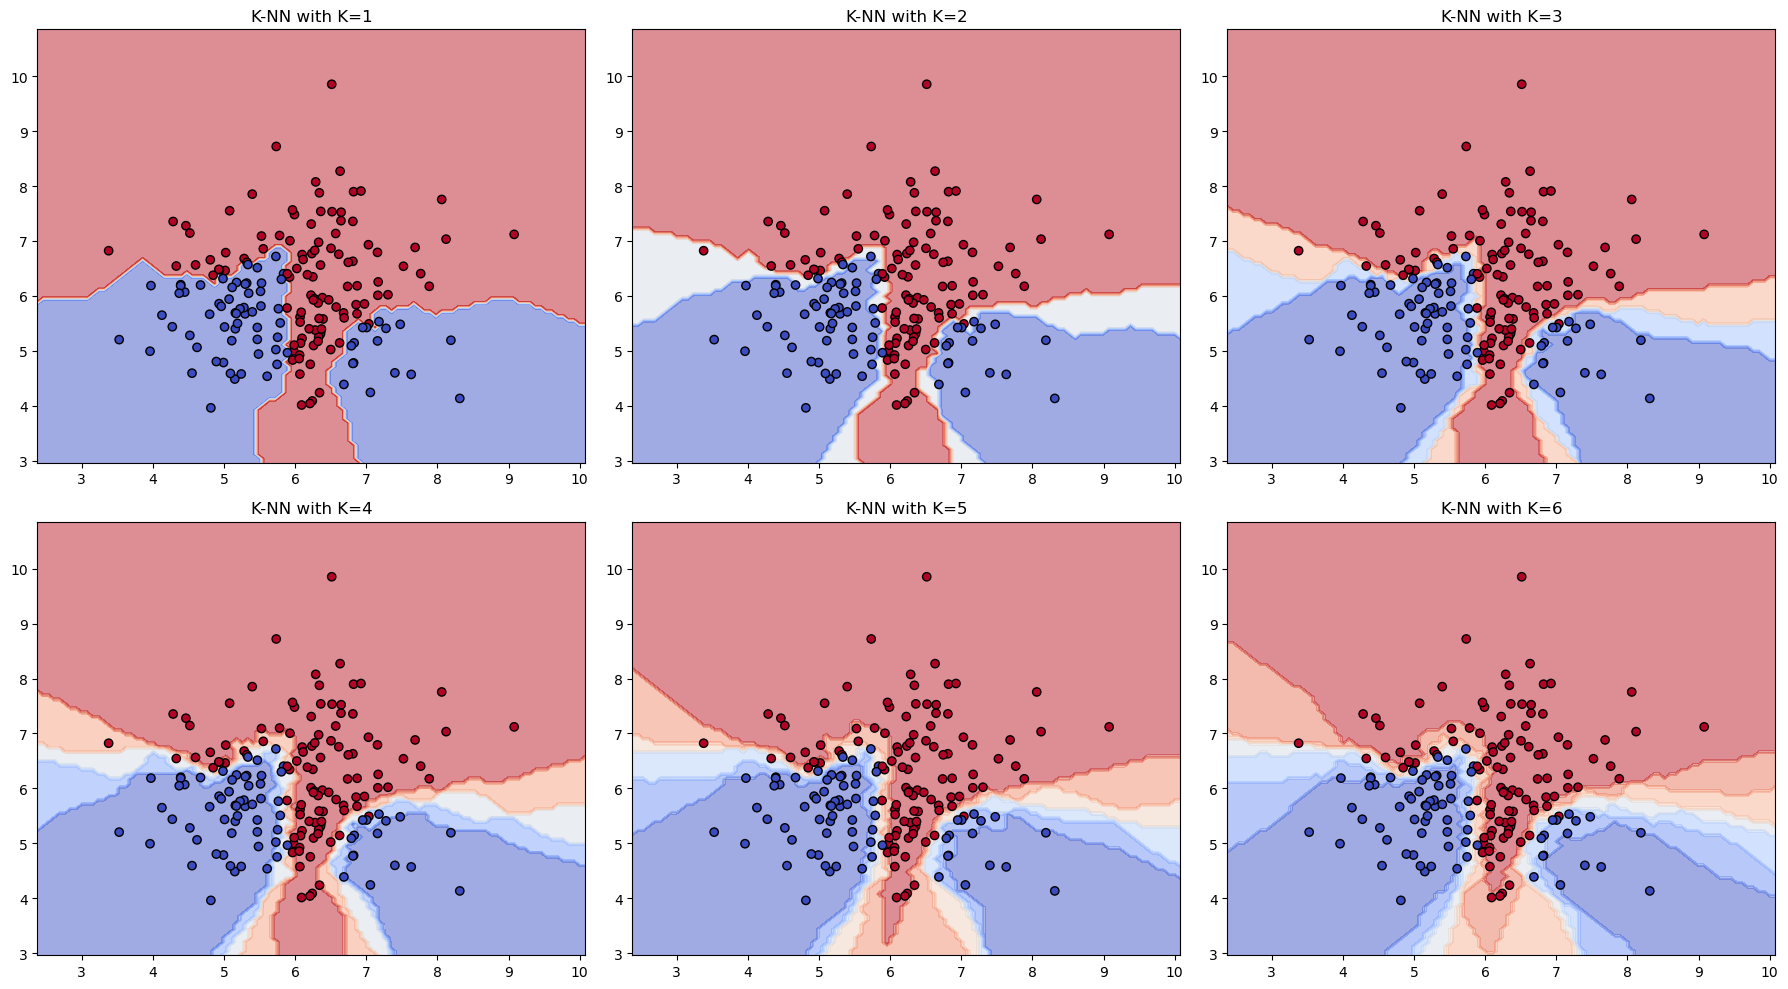

In [101]:
from sklearn.neighbors import KNeighborsClassifier

# Create a figure to hold the subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten() # Flatten the 2x3 grid into a 1D array

for i, k in enumerate(range(1, 7)):
    # Create and fit the KNN pipeline
    knn_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])
    knn_pipeline.fit(X_train, y_train)

    # Plotting the decision boundary
    ax = axes[i]
    DecisionBoundaryDisplay.from_estimator(
        knn_pipeline, X_train,
        response_method="predict_proba",
        cmap=plt.cm.coolwarm,
        alpha=0.5,
        levels=20,
        ax=ax
    )
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolor='k')
    ax.set_title(f"K-NN with K={k}")

plt.tight_layout()
plt.show()

**Briefly explain what's happening**

As K increases, the decision boundary becomes smoother and less sensitive to individual data points

## Naive Bayes

**Choose a suitable Naive Bayes classifier, and do same thing**

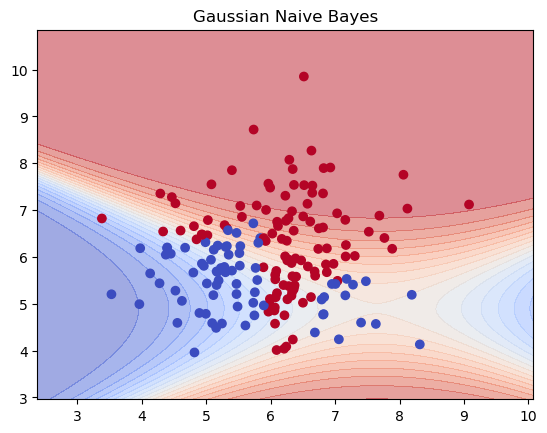

In [102]:
from sklearn.naive_bayes import GaussianNB

# Create and fit the Gaussian Naive Bayes pipeline
nb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('nb', GaussianNB())
])
nb_pipeline.fit(X_train, y_train)

# Plot the probability heatmap
plot_contour(X_train, y_train, nb_pipeline, title="Gaussian Naive Bayes")

**Are there any hyper-parameter?**

GaussianNB classifier has no major hyperparameters, it's primary parameter is stability parameter.

***Bonus question: explain what is going on your plot.***

The plot shows a smooth, quadratic decision boundary. This is characteristic of Gaussian Naive Bayes when the covariance matrices of the classes are different.